
# SPATIAL VARIABILITY OF AOD AND ANGSTRÖM EXPONENT

## NeGI - Andøya - 2018

Paulina Tedesco:
paulinatedesco@gmail.com

Group assistant: Jonas Gliss

# Abstract



# Introduction


- Why am I studying this topic?
- What are my hypothesis?
- What is done in this notebook?
- Some background (on models and observations) and underlying theory (check for 2-3 papers with assistants and teachers if needed)
- Present equations if needed (Latex)


Many studies reveal that there exist differences in simulated aerosol climate effects between high- and low-resolution models due to subgrid aerosol variability (e.g. Anderson et al., 2003; Weigum et al., 2012). By running the WRF-Chem and isolating the effect of aerosol variability from other sources of model variability, Weigum, N., Schutgens, N., and Stier, P (2016) demonstrate that AOD is underestimated by 13 % when aerosol and gases are simulated at 80 km resolution compared to 10 km; this difference is larger for lower resolution models. They also prove that when variability on scales smaller than a grid box is neglected, non-linearity of processes like gas-phase quemistry and  aerosol uptake of water through aerosol–gas equilibrium reactions result in large changes in aerosol properties, which are exaggerated by convective transport.

Wang, R., Andrews, E., Balkanski, Y., Boucher, O., Myhre, G., Samset, B. H., et al. (2018) investigate the uncertainty in the direct radiative forcing of black carbon (BC). They evaluated the spatial representativeness error for local measurements of the networks AERONET and Global Atmospher Watch (GAW) with a global black carbon model at a resolution of 2° × 2° by downscaling BC aerosol absorption optical depth to 0.1° × 0.1°. The global representativeness error (RE) for AERONET sites is 30%, while the representativeness error for GAW is 7%. The difference relies in the fact that the GAW sites are located in such way that the stations with necative representative error comensate for those with positive representative error.

Given the high resolution annual mean of BC AAOD (in this case, the scaled BC AAOD at the 0.1° × 0.1° are used in absence of global high resolution observations), $C_{high-res}$, , and the annual mean of BC AAOD over a low-resolution grid box of g° × g° (estimated as the average over n = (10 g)2 0.1° × 0.1° grid boxes with the monitoring site closest to the center), $C_{low-res}$, the relative error ($RE$) is defined as follows:

\begin{equation}
   RE = \frac{C_{high-res}-C_{low-res}}{C_{low-res}}
\end{equation}

An RE of zero indicates that the site is perfectly representative of the coarse grid box.





should focus on accounting for the effect of subgrid variability
on these processes at global scales in order to improve
model predictions of the aerosol effect on climate.

One of the major challenges to future modelling is determining
how to account for the subgrid variability of these
aerosol processes

# Methods



## Packages used

In [1]:
import pyaerocom as pya
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cartopy.crs as ccrs
import pandas as pd
from datetime import datetime
from dateutil.parser import parse

## My functions

In [2]:
from station_map import station_map

from nobs import read_nobs
from nobs import plot_nobs
from nobs import write_df

from plot_aeronet_aod import plot_aeronet_aod

from linreg import ols

Pyaerocom, blablabal

In [3]:
# comment the following line to see the warnings
warnings.filterwarnings("ignore")

## Datasets

In this project, we compare AOD and Angstrõm exponent AERONET observations in the Artic with three models, ECMWF-IFS reanalysis, ECMWF5.3-OSLO and SPRINTARS. The data files used in this project can be found at NIRD; see the paths below.

Paths to AERONET data

In [4]:
obs_dir = ('/mnt/data/inputs/pyaerocom-testdata/obsdata/AeronetSunV3Lev2.0.daily/renamed')

svalbard_files = ['Hornsund.lev30', 'Longyearbyen.lev30', "Ny_Alesund.lev30"]
svalbard_path_list = [obs_dir + '/' + s for s in svalbard_files]

eureka_files = ['OPAL.lev30', 'PEARL.lev30']
eureka_path_list = [obs_dir + '/' + s for s in eureka_files]

dragon_path_list = glob.glob(os.path.join(obs_dir,'DRAGON*.lev30'))

Paths to model data

In [5]:
ecmwf_dir = ('/mnt/data/inputs/pyaerocom-testdata/modeldata/ECMWF_CAMS_REAN/renamed/')
ecmwf_path_list = glob.glob(os.path.join(ecmwf_dir, 'ECMWF_CAMS_REAN.daily.od550aer.2*.nc'))
ecmwf_path_list.sort()

ecmwf_dir_ang = ('/mnt/data/inputs/pyaerocom-testdata/modeldata/ECMWF_CAMS_REAN/renamed/')
ecmwf_path_list_ang = glob.glob(os.path.join(ecmwf_dir, 'ECMWF_CAMS_REAN.daily.ang4487aer.2*.nc'))
ecmwf_path_list_ang.sort()

cam53_dir = ('/mnt/data/inputs/pyaerocom-testdata/modeldata/CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED/renamed/')
cam53_path_list = glob.glob(os.path.join(cam53_dir, '*_od550csaer_Column_2*.nc'))
cam53_path_list.sort()

sprintars_path_list = ['/mnt/data/inputs/pyaerocom-testdata/modeldata/SPRINTARS-T213_AP3-CTRL2016-PD/renamed/aerocom3_SPRINTARS-T213_AP3-CTRL2016-PD_od550aer_Column_2010_3hourly.nc']

### Observations

#### AERONET

The AERONET (blabal
photometer




<img src="files/images/avignon3.jpg">

##### Read the observations 

The observations are read using the pyaerocom library.

In [6]:
reader = pya.io.ReadAeronetSunV3()
svalbard_data = reader.read(files=svalbard_path_list, vars_to_retrieve=['od550aer', 'ang4487aer'])
eureka_data = reader.read(files=eureka_path_list, vars_to_retrieve=['od550aer', 'ang4487aer'])
dragon_data = reader.read(files=dragon_path_list, vars_to_retrieve=['od550aer', 'ang4487aer'])

Reading file 0 of 3 (ReadAeronetSunV3)
Reading file 1 of 3 (ReadAeronetSunV3)
Reading file 2 of 3 (ReadAeronetSunV3)
Reading file 0 of 2 (ReadAeronetSunV3)
Reading file 1 of 2 (ReadAeronetSunV3)
Reading file 0 of 135 (ReadAeronetSunV3)
Reading file 13 of 135 (ReadAeronetSunV3)
Reading file 26 of 135 (ReadAeronetSunV3)
Reading file 39 of 135 (ReadAeronetSunV3)
Reading file 52 of 135 (ReadAeronetSunV3)
Reading file 65 of 135 (ReadAeronetSunV3)
Reading file 78 of 135 (ReadAeronetSunV3)
Reading file 91 of 135 (ReadAeronetSunV3)
Reading file 104 of 135 (ReadAeronetSunV3)
Reading file 117 of 135 (ReadAeronetSunV3)
Reading file 130 of 135 (ReadAeronetSunV3)


Our aim is to find AERONET stations that are located close to each other, in order to compare the measurements to a certain grid box of the models selected. The map below shows the locations of these stations. There are three stations in Svalbard (Hornsund, Longyearbyen, and Ny Ålesund) and two stations in Eureka (Opal and Pearl). The locations for the DRAGON campaigns are shown in green, but these are not in the Arctic. However, it would be of interest to to compare in the future the data of these stations with the models.

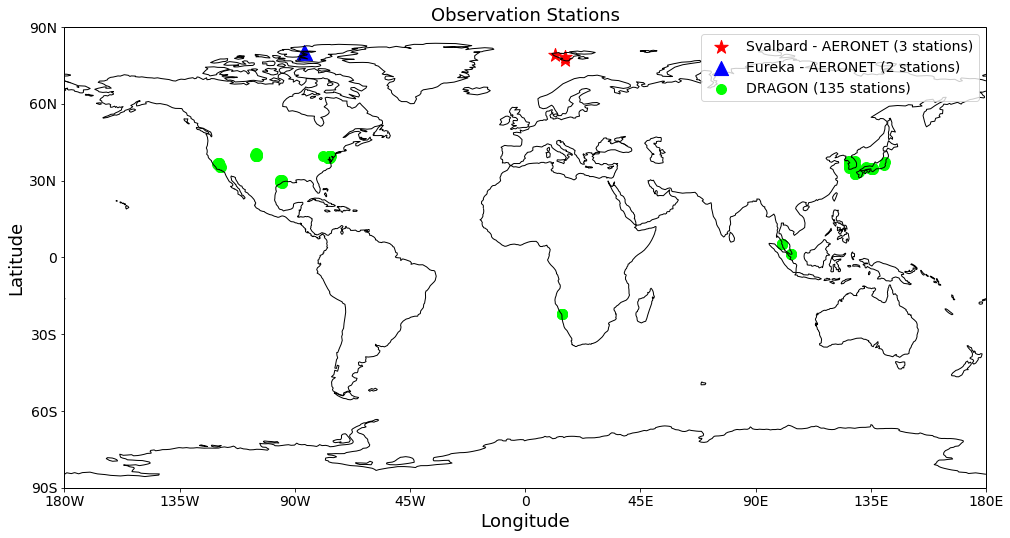

In [7]:
station_map(svalbard_data=svalbard_data, eureka_data=eureka_data, dragon_data=dragon_data)

Unfortunately, the time series on Svalbard do not overlap during a long enough period (see next figure). For that reason, only the stations Opal and Pearl are used in the analysis.

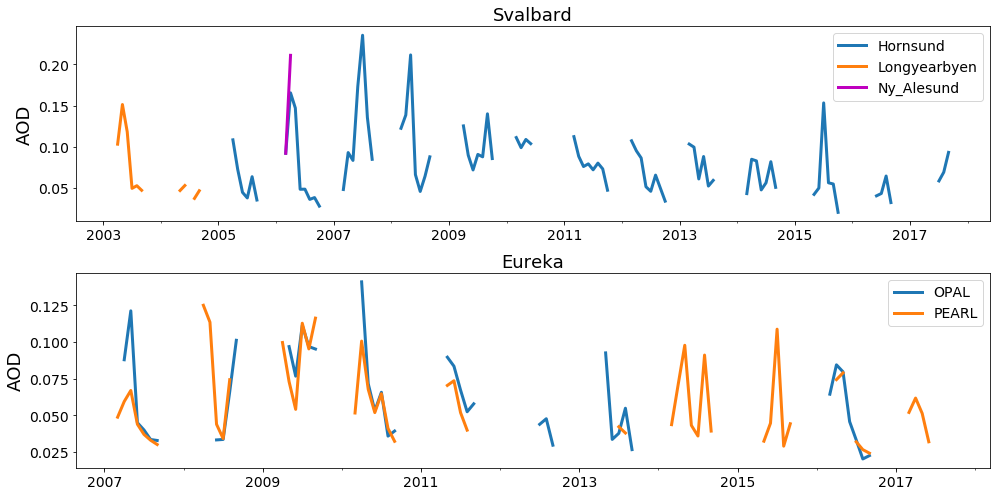

In [8]:
plot_aeronet_aod(svalbard_data=svalbard_data, eureka_data=eureka_data)

In [9]:
print('Location of Opal: ', round(eureka_data['OPAL'].latitude, 2),'N, ', round(eureka_data['OPAL'].longitude, 2), 'E' )
print('Location of Pearl: ', round(eureka_data['PEARL'].latitude, 2), 'N, ', round(eureka_data['PEARL'].longitude, 2), 'E' )

Location of Opal:  79.99 N,  -85.94 E
Location of Pearl:  80.05 N,  -86.42 E


The figure above shows the monthly average of AOD at the AERONET stations in Svalbard and Eureka. The daily data can be explored in the interactive plots shown below. Notice the monthly variability in number of observations. The years with more observations are 2009-2011.

In [10]:
def plot_year(data, year=2004):
    try:
        stations=data.to_station_data_all(start=year, freq='daily')
        stations[0].od550aer.plot()
        stations[1].od550aer.plot()
    except:
        print('Failed to access data for {}'.format(year))
        
from ipywidgets import interact, fixed
interact(plot_year, data=fixed(eureka_data), year=np.arange(2007, 2016))

interactive(children=(Dropdown(description='year', options=(2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 20…

<function __main__.plot_year(data, year=2004)>

#### MODIS-AQUA

Write something about MODIS.

MODIS data is also read using pyaerocom. The following interactive maps exhibit global AOD. Time stamps, maximum and minimum values can be controlled.

In [11]:
from ipywidgets import interact
pya.const.BASEDIR = '/mnt/data/inputs/pyaerocom-testdata/'

modis_data = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer')

# Interactive plot
fig = plt.figure(figsize=(10, 6))
interact(modis_data.quickplot_map, time_idx=(80, 120), xlim=fixed((-180, 180)), 
         ylim=fixed((-90, 90)), vmin=(0, 0.5), vmax=(0.5, 1.5), log_scale=fixed(True),
         add_zero=True, fig=fixed(fig))

<Figure size 720x432 with 0 Axes>

interactive(children=(IntSlider(value=80, description='time_idx', max=120, min=80), FloatSlider(value=0.25, de…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

It is also possible to zoom into our region of interest.

In [12]:
fig = plt.figure(figsize=(10, 6))
interact(modis_data.quickplot_map, time_idx=(80, 200), xlim=fixed((-100, 0)), 
         ylim=fixed((30, 90)), vmin=(0, 0.5), vmax=(0.5, 1.5), log_scale=fixed(True),
         add_zero=True, fig=fixed(fig))

<Figure size 720x432 with 0 Axes>

interactive(children=(IntSlider(value=80, description='time_idx', max=200, min=80), FloatSlider(value=0.25, de…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### Models

#### ECMWF - IFS Reanalysis

Write something about the model

##### Extract time stamps using pyaerocom.

# Concatenate the timestamps of all the files


In [13]:

for i, path in enumerate(ecmwf_path_list):
    ecmwf_data = pya.GriddedData(ecmwf_path_list[i])
    time_stamps_i = ecmwf_data.time_stamps()
    if i == 0:
        time_stamps = time_stamps_i
    else:
        time_stamps = np.concatenate((time_stamps, time_stamps_i), axis=0, out=None)  

for i, path in enumerate(ecmwf_path_list_ang):
    ecmwf_data_ang = pya.GriddedData(ecmwf_path_list[i])
    time_stamps_i = ecmwf_data_ang.time_stamps()
    if i == 0:
        time_stamps_ang = time_stamps_i
    else:
        time_stamps_ang = np.concatenate((time_stamps_ang, time_stamps_i), axis=0, out=None)  

##### Open the files and add time stamps

The time coordinate in the netcdf files is missing, so they have to be added using pyaerocom.

In [14]:
# AOD
ecmwf_data = xr.open_mfdataset(ecmwf_path_list, chunks=None, concat_dim='time')
ecmwf_data.coords['time']= pd.to_datetime(time_stamps)

# Angström exponent
ecmwf_data_ang = xr.open_mfdataset(ecmwf_path_list_ang, chunks=None, concat_dim='time')
ecmwf_data_ang.coords['time']= pd.to_datetime(time_stamps_ang)


#### ECMWF CAM5.3 OSLO

Write something about the model

##### Open files using xarray

In [15]:
cam53_data = xr.open_mfdataset(cam53_path_list, chunks=None, concat_dim='time')

#### SPRINTARS-T213_AP3-

Write something about the model

##### Open files using xarray

In [16]:
sprintars_data = xr.open_mfdataset(sprintars_path_list, chunks=None, concat_dim='time')

## Analysis

### Plot number of observations

As mentioned above, there is a large variability in number of observations. This is shown with more details in the following figure.

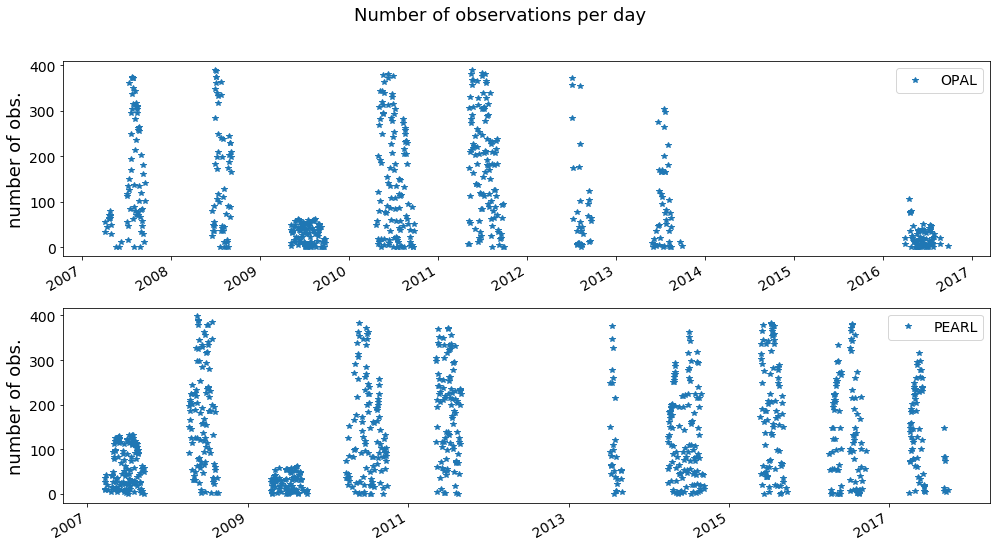

In [17]:
var_code = ['N[AOD_500nm]']
#var_code = ['N[AOD_500nm]', 'N[440-870_Angstrom_Exponent]']  # uncomment this line to see the numbers of observartions   
                                                                # for the angstrom exponent.
var_name = ['aod', 'ang']
num_obs = plot_nobs(var_code, var_name, eureka_path_list, eureka_data)

#plt.savefig('results/num_obs_daily.png')

There are, surprisingly, not so many observations in  2009, in OPAL and PEARL. Since we are looking at clear-sky observations, it would be interesting to determine whether this is due to a particular event or a problem with the instruments.

#### Write the data in a data frame

#####   Remove NaNs and records with less than 10 measurements. Append AOD and Angstrom exponent to the data frame num_obs

In [18]:
lat_pearl = eureka_data['PEARL'].latitude
lon_pearl = eureka_data['PEARL'].longitude
num_obs, ecmwf_aod_PEARL = write_df(num_obs, eureka_data, ecmwf_data, ecmwf_data_ang, sprintars_data, lat_pearl, lon_pearl)


#### Normalized distribution of difference of number of observations between Opal and Pearl

Text(0.5,1,'Difference of nr. observations (normalized) \n Opal-Pearl')

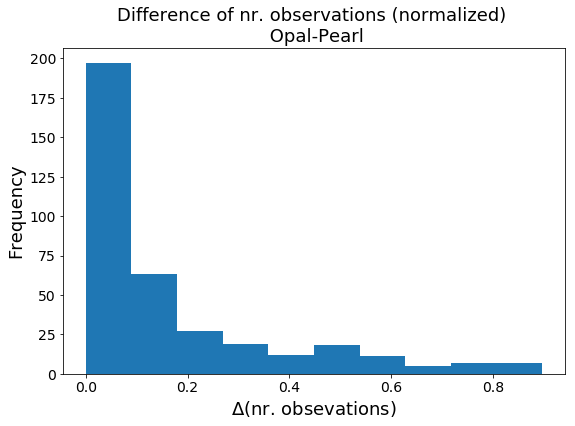

In [19]:
fig = plt.figure(figsize=(9, 6))
num_obs['diff_nobs'] = abs(num_obs['nobs_aod_OPAL'] - num_obs['nobs_aod_PEARL'])
max_obs = num_obs.max().max()
num_obs['diff_nobs'] = num_obs['diff_nobs']/max_obs
plt.hist(num_obs['diff_nobs'])
plt.xlabel(r'$\Delta$(nr. obsevations)')
plt.ylabel('Frequency')
plt.title('Difference of nr. observations (normalized) \n Opal-Pearl')
# plt.savefig('results/hist_delta_nobs.png')

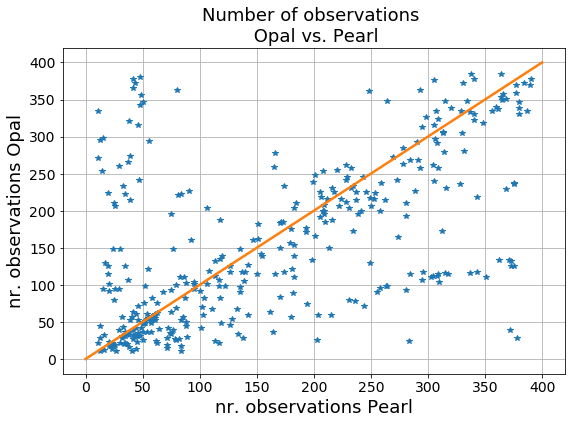

In [20]:
fig = plt.figure(figsize=(9, 6))
plt.plot(num_obs['nobs_aod_OPAL'], num_obs['nobs_aod_PEARL'], '*')
plt.xlabel('nr. observations Pearl')
plt.ylabel('nr. observations Opal')
x = (0, 400)
plt.plot(x, x, linewidth=2.5)
plt.title('Number of observations \n Opal vs. Pearl')
plt.grid()
#plt.savefig('results/scatter_nobs_opal_pearl.png')

#### Bias as a function of the difference of number of observations

Text(0.5,1,'AOD bias (Opal-Pearl)')

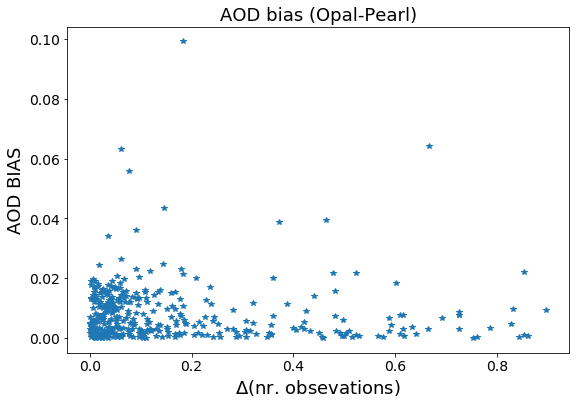

In [21]:
fig = plt.figure(figsize=(9, 6))
num_obs['bias_aod'] = abs(num_obs['aod_OPAL'] - num_obs['aod_PEARL'])
plt.plot(num_obs['diff_nobs'], num_obs['bias_aod'], '*')
plt.ylabel('AOD BIAS')
plt.xlabel(r'$\Delta$(nr. obsevations)')
plt.title('AOD bias (Opal-Pearl)')
#plt.savefig('results/scatter_bias_nobs.png')

### Linear Regression

#### AOD

##### AERONET Pearl -  AERONET Opal

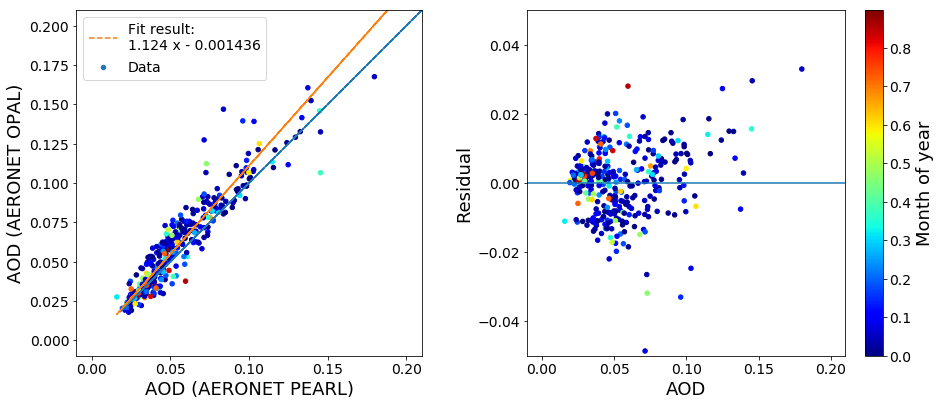

AOD R-square coefficient (AERONET Pearl, AERONET Opal): 0.91


In [22]:
x = num_obs['aod_PEARL']
y = num_obs['aod_OPAL']

r2 = ols(x, y, num_obs['diff_nobs'],'AOD', 'AERONET PEARL', 'AERONET OPAL', data_var = 'aeronet_aod')
print('AOD R-square coefficient (AERONET Pearl, AERONET Opal):', round(r2, 2))

Change the colour sequence to months of the year

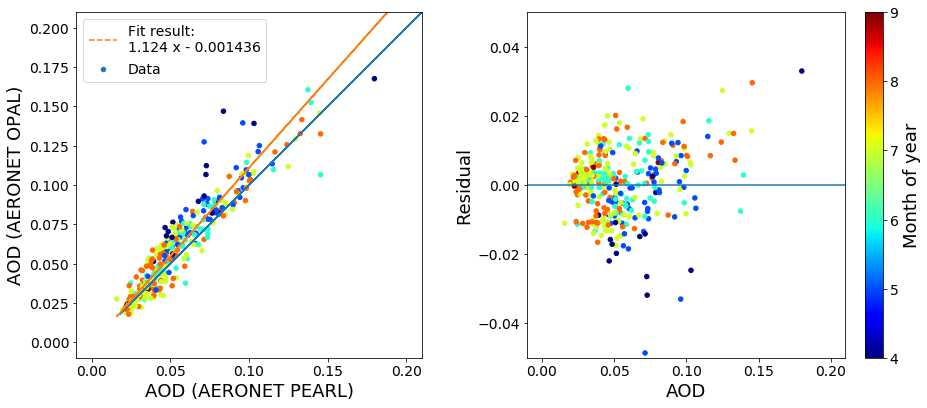

In [23]:
x = num_obs['aod_PEARL']
y = num_obs['aod_OPAL']
r2 = ols(x, y, num_obs.index.month,'AOD', 'AERONET PEARL', 'AERONET OPAL', data_var = 'aeronet_aod')
#plt.savefig('results/regression_pearl_opal.png')


##### AERONET Pearl -  ECMWF-IFS Pearl

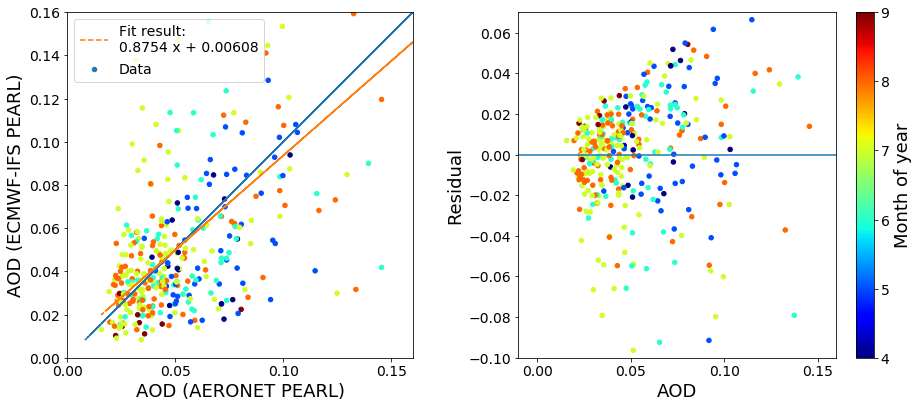

AOD R-square coefficient (AERONET Pearl, ECMWF Pearl): 0.32


In [24]:
x = num_obs['aod_PEARL']
#x = num_obs['aod_OPAL']
y = num_obs['ecmwf_aod_PEARL']
r2 = ols(x, y, num_obs.index.month,'AOD', 'AERONET PEARL', 'ECMWF-IFS PEARL', data_var = 'ecmwf_aod')
print('AOD R-square coefficient (AERONET Pearl, ECMWF Pearl):', round(r2, 2))
#plt.savefig('results/regression_pearl_ecmwf.png')

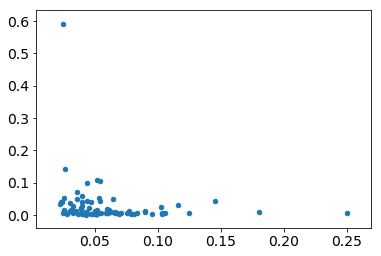

In [25]:
x = num_obs['aod_PEARL'].loc['20100101':'20101231']
y = num_obs['sprintars_aod_PEARL'].loc['20100101':'20101231']
#r2 = ols(x, y,'AOD', 'AERONET PEARL', 'SPRINTARS PEARL')
#print('AOD R-square coefficient (AERONET Pearl, ECMWF Pearl):', round(r2, 2))
fig
plt.scatter(x, y, marker='o', s=20, cmap='jet', label='Data')

#### Angström exponent

##### AERONET Pearl -  AERONET Opal

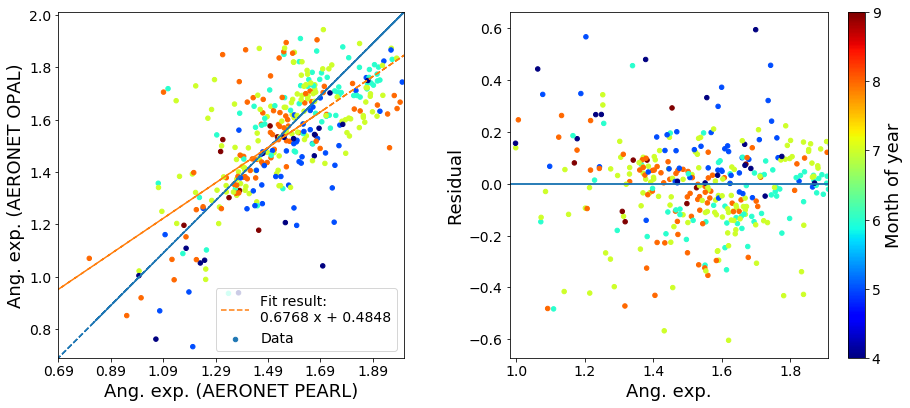

Ang. exp. R-square coefficient (AERONET Pearl, AERONET Opal): 0.46


In [26]:
x = num_obs['ang_PEARL']
y = num_obs['ang_OPAL']
r2 = ols(x, y, num_obs.index.month,'Ang. exp.', 'AERONET PEARL', 'AERONET OPAL', data_var = 'aeronet_ang')
print('Ang. exp. R-square coefficient (AERONET Pearl, AERONET Opal):', round(r2, 2))
#plt.savefig('results/regression_ang_pearl_opal.png')

##### AERONET Pearl -  ECMWF-IFS Pearl

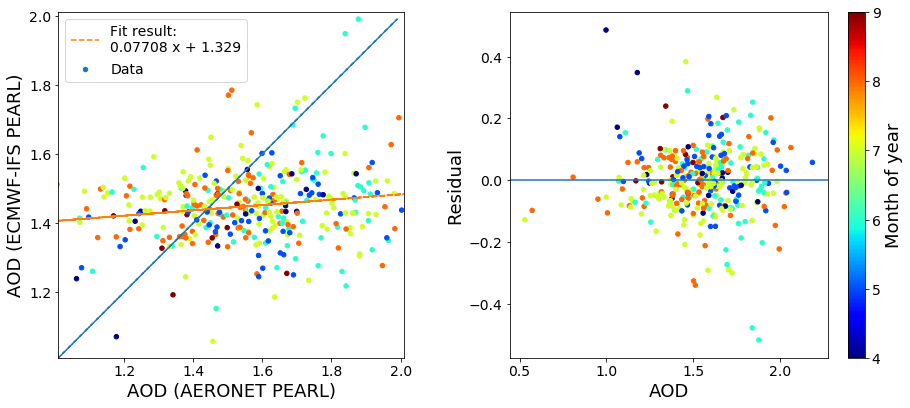

Ang. exp. R-square coefficient (AERONET Pearl, ECMWF Pearl): 0.03


In [27]:
x = num_obs['ang_PEARL']
#x = num_obs['ang_OPAL']
y = num_obs['ecmwf_ang_PEARL']
r2 = ols(x, y, num_obs.index.month,'AOD', 'AERONET PEARL', 'ECMWF-IFS PEARL', data_var = 'ecmwf_ang')
print('Ang. exp. R-square coefficient (AERONET Pearl, ECMWF Pearl):', round(r2, 2))
#plt.savefig('results/regression_ang_pearl_ecmwf.png')

### Time series

Eureka (79.875 N, 273.375 E)

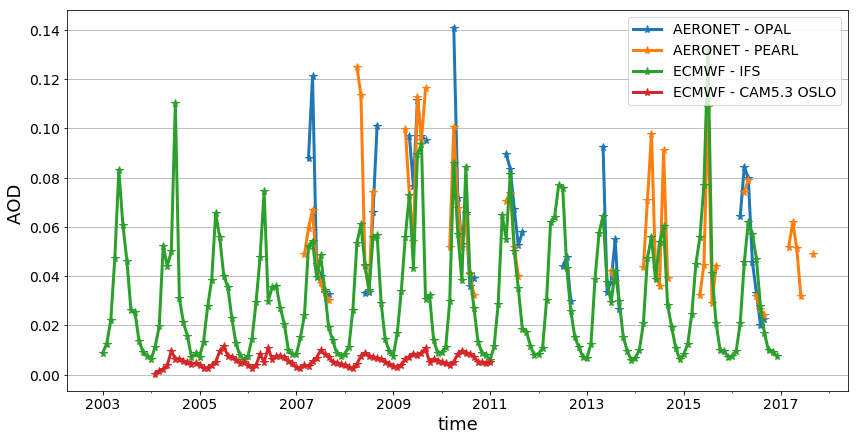

In [28]:
fig = plt.figure(figsize=(14,7))
#fig.suptitle('AOD at 77.5N, 15E in 2010',  y=1.05, fontsize=17)

eureka_data[0].od550aer.resample('M').mean().plot(label='AERONET - OPAL', linewidth=3, marker='*', markersize=8)
eureka_data[1].od550aer.resample('M').mean().plot(label='AERONET - PEARL', linewidth=3, marker='*', markersize=8)

time_series = ecmwf_data['od550aer'].sel(lat=eureka_data['PEARL'].latitude, lon=360+eureka_data['PEARL'].longitude, method='nearest')
time_series.to_series().resample('M').mean().plot(linewidth=3, label='ECMWF - IFS', marker='*', markersize=8)


time_series2 = cam53_data['od550csaer'].sel(lat=eureka_data['PEARL'].latitude, lon=360+eureka_data['PEARL'].longitude, method='nearest')
time_series2.to_series().resample('M').mean().plot(linewidth=3, label='ECMWF - CAM5.3 OSLO', marker='*', markersize=8)



plt.grid(True, axis='y')
plt.ylabel('AOD ')
plt.legend()

#plt.savefig('results/long_timeseries_aod.png')

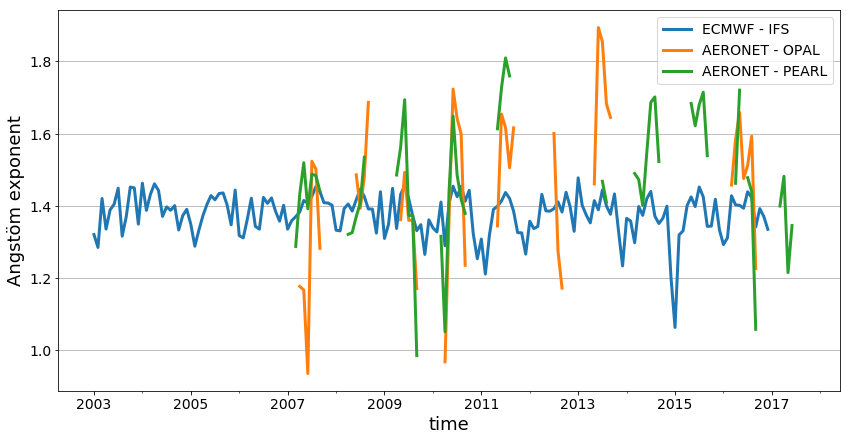

In [29]:
fig = plt.figure(figsize=(14,7))
#fig.suptitle('Ang. exp. at 80n, 15E in 2010',  y=1.05, fontsize=17)

time_series = ecmwf_data_ang['ang4487aer'].sel(lat=eureka_data['PEARL'].latitude, lon=360+eureka_data['PEARL'].longitude, method='nearest')
time_series.to_series().resample('M').mean().plot(linewidth=3, label='ECMWF - IFS')

eureka_data[0].ang4487aer.resample('M').mean().plot(label='AERONET - OPAL', linewidth=3)
eureka_data[1].ang4487aer.resample('M').mean().plot(label='AERONET - PEARL', linewidth=3)

plt.grid(True, axis='y')
plt.ylabel('Angstöm exponent')
plt.legend()

#### AOD and Angström exponent

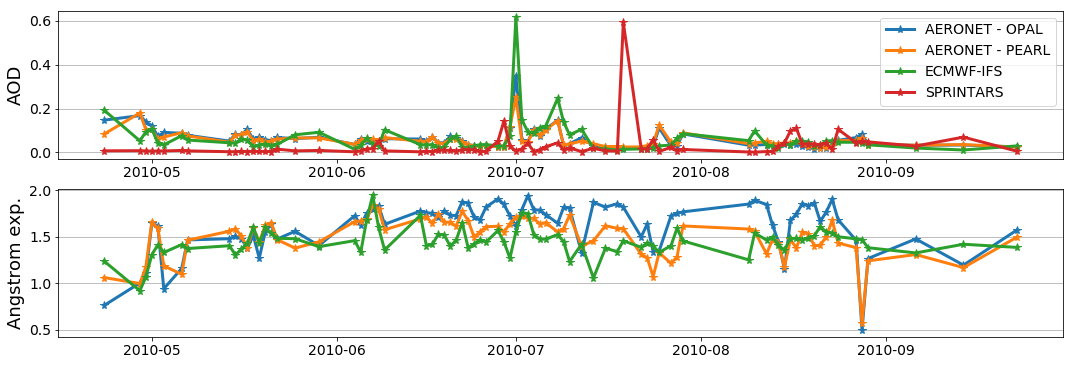

In [30]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(2,1,1)
num_obs_2010 = num_obs.loc['20100101':'20101231']

plt.plot(num_obs_2010['aod_OPAL'], linewidth=3, label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_2010['aod_PEARL'], linewidth=3, label = 'AERONET - PEARL', marker='*', markersize=8)
plt.plot(num_obs_2010['ecmwf_aod_PEARL'], linewidth=3, label = 'ECMWF-IFS', marker='*', markersize=8)
plt.plot(num_obs_2010['sprintars_aod_PEARL'], linewidth=3, label = 'SPRINTARS', marker='*', markersize=8)
plt.ylabel('AOD')
plt.legend()
plt.grid(True, axis='y')

plt.subplot(2,1,2)
plt.plot(num_obs_2010['ang_OPAL'], linewidth=3, label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_2010['ang_PEARL'], linewidth=3, label = 'AERONET - PEARL', marker='*', markersize=8)
plt.plot(num_obs_2010['ecmwf_ang_PEARL'], linewidth=3, label = 'ECMWF-IFS', marker='*', markersize=8)
plt.ylabel('Angstrom exp.')
plt.grid(True, axis='y')

#plt.savefig('results/aod_ang_timeseries_2010.png')

#### Bias

In [54]:
bias_opal_aod = abs(num_obs['aod_PEARL'] - num_obs['aod_OPAL'])
bias_ecmwf_aod = abs(num_obs['aod_PEARL'] - num_obs['ecmwf_aod_PEARL'])
bias_sprintars_aod = abs(num_obs['aod_PEARL'] - num_obs['sprintars_aod_PEARL'])

bias_opal_ang = abs(num_obs['ang_PEARL'] - num_obs['ang_OPAL'])
bias_ecmwf_ang = abs(num_obs['ang_PEARL'] - num_obs['ecmwf_ang_PEARL'])

print('Bias: AOD, AERONET Opal-Pearl = ', round(bias_opal_aod.mean(), 2))
print('Bias: AOD, AERONET - ECMWF-IFS Pearl = ', round(bias_ecmwf_aod.mean(), 2))
print('Bias: AOD, AERONET - SPRINTARS Pearl = ', round(bias_sprintars_aod.mean(), 2))

print('Bias: Ang. exp., AERONET Opal-Pearl = ', round(bias_opal_ang.mean(), 2))
print('Bias: Ang. exp., AERONET - ECMWF-IFS Pearl = ', round(bias_ecmwf_ang.mean(), 2))

Bias: AOD, AERONET Opal-Pearl =  0.01
Bias: AOD, AERONET - ECMWF-IFS Pearl =  0.02
Bias: AOD, AERONET - SPRINTARS Pearl =  0.05
Bias: Ang. exp., AERONET Opal-Pearl =  0.14
Bias: Ang. exp., AERONET - ECMWF-IFS Pearl =  0.21


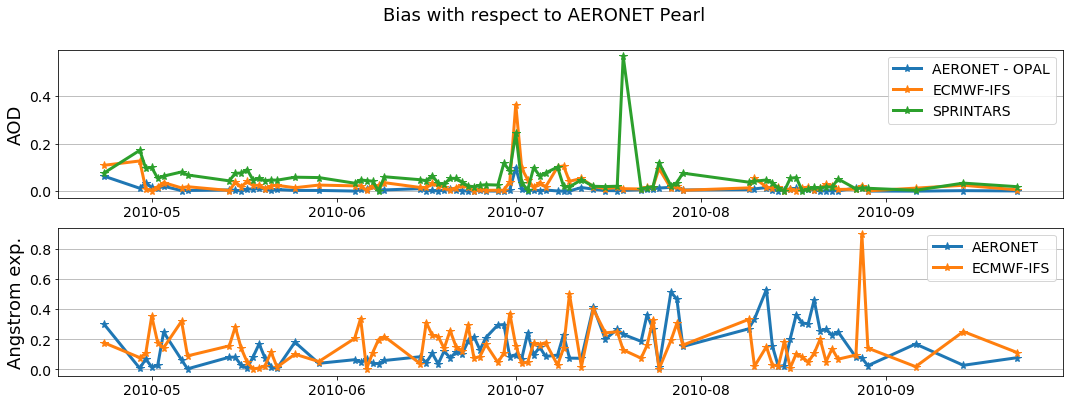

In [31]:

fig = plt.figure(figsize=(18, 6))
fig.suptitle('Bias with respect to AERONET Pearl')

plt.subplot(2,1,1)

bias_opal_aod = abs(num_obs_2010['aod_PEARL'] - num_obs_2010['aod_OPAL'])
bias_ecmwf_aod = abs(num_obs_2010['aod_PEARL'] - num_obs_2010['ecmwf_aod_PEARL'])
bias_sprintars_aod = abs(num_obs_2010['aod_PEARL'] - num_obs_2010['sprintars_aod_PEARL'])

plt.plot(bias_opal_aod, linewidth=3, label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(bias_ecmwf_aod, linewidth=3, label = 'ECMWF-IFS', marker='*', markersize=8)
plt.plot(bias_sprintars_aod, linewidth=3, label = 'SPRINTARS', marker='*', markersize=8)
plt.ylabel('AOD')
plt.legend()
plt.grid(True, axis='y')

plt.subplot(2,1,2)

bias_opal_ang = abs(num_obs_2010['ang_PEARL'] - num_obs_2010['ang_OPAL'])
bias_ecmwf_ang = abs(num_obs_2010['ang_PEARL'] - num_obs_2010['ecmwf_ang_PEARL'])

plt.plot(bias_opal_ang, linewidth=3, label = 'AERONET', marker='*', markersize=8)
plt.plot(bias_ecmwf_ang, linewidth=3, label = 'ECMWF-IFS', marker='*', markersize=8)
plt.legend()
plt.ylabel('Angstrom exp.')
plt.grid(True, axis='y')

# plt.savefig('results/aod_ang_timeseries_2010_bias.png')

In [32]:
print('Bias: AOD, AERONET Opal-Pearl = ', round(bias_opal_aod.sum(), 2))
print('Bias: AOD, AERONET - ECMWF-IFS Pearl = ', round(bias_ecmwf_aod.sum(), 2))
print('Bias: AOD, AERONET - SPRINTARS Pearl = ', round(bias_sprintars_aod.sum(), 2))

print('Bias: Ang. exp., AERONET Opal-Pearl = ', round(bias_opal_ang.sum(), 2))
print('Bias: Ang. exp., AERONET - ECMWF-IFS Pearl = ', round(bias_ecmwf_ang.sum(), 2))

Bias: AOD, AERONET Opal-Pearl =  0.69
Bias: AOD, AERONET - ECMWF-IFS Pearl =  2.36
Bias: AOD, AERONET - SPRINTARS Pearl =  4.41
Bias: Ang. exp., AERONET Opal-Pearl =  12.63
Bias: Ang. exp., AERONET - ECMWF-IFS Pearl =  12.82


##### Zoom

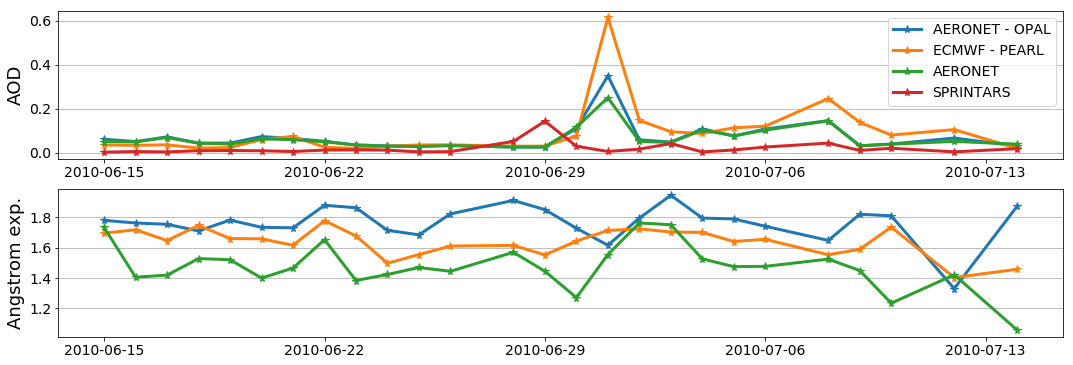

In [33]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(2,1,1)
num_obs_july = num_obs.loc['20100615':'20100715']

plt.plot(num_obs_july['aod_OPAL'], linewidth=3, label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_july['ecmwf_aod_PEARL'], linewidth=3, label = 'ECMWF - PEARL', marker='*', markersize=8)
plt.plot(num_obs_july['aod_PEARL'], linewidth=3, label = 'AERONET', marker='*', markersize=8)
plt.plot(num_obs_july['sprintars_aod_PEARL'], linewidth=3, label = 'SPRINTARS', marker='*', markersize=8)
plt.ylabel('AOD')
plt.legend()
plt.grid(True, axis='y')


plt.subplot(2,1,2)
plt.plot(num_obs_july['ang_OPAL'], linewidth=3, label = 'AERONET - OPAL', marker='*', markersize=8)
plt.plot(num_obs_july['ang_PEARL'], linewidth=3, label = 'AERONET - PEARL', marker='*', markersize=8)
plt.plot(num_obs_july['ecmwf_ang_PEARL'], linewidth=3, label = 'ECMWF', marker='*', markersize=8)
plt.ylabel('Angstrom exp.')
plt.grid(True, axis='y')

#plt.savefig('results/aod_ang_timeseries_2010_zoom.png')

#### Climatology

In [34]:
#num_obs.resample
num_obs_xarray = num_obs.to_xarray()
num_obs_clima = num_obs_xarray.groupby('index.month').mean('index')

s_aod = num_obs_clima.aod_OPAL.to_series()

s_ang = num_obs_clima.ang_OPAL.to_series()

s_aod.index.values


base_date = np.datetime64('2010', 'Y')
months_rel = s_aod.index.values -1
dates = base_date + months_rel.astype('timedelta64[M]')


s_aod.index = dates
s_ang.index = dates

# s_ang.plot()
#num_obs_clima['aod_OPAL'].plot()

#### Monthly average 2010

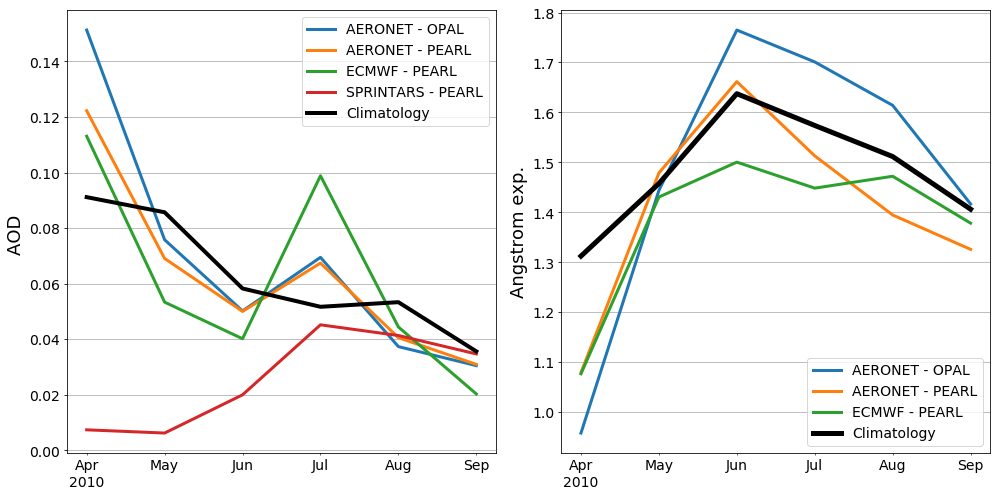

In [35]:
fig = plt.figure(figsize=(14,7))
#fig.suptitle('AOD at 80N, 15E in 2010',  y=1.05, fontsize=17)
plt.subplot(1, 2, 1)
time_series_opal = num_obs_2010['aod_OPAL'].resample('M').mean().plot(linewidth = 3, label='AERONET - OPAL')
time_series_pearl = num_obs_2010['aod_PEARL'].resample('M').mean().plot(linewidth = 3, label='AERONET - PEARL')
time_series_ecmwf = num_obs_2010['ecmwf_aod_PEARL'].resample('M').mean().plot(linewidth = 3, label='ECMWF - PEARL')
time_series_sprintars = num_obs_2010['sprintars_aod_PEARL'].resample('M').mean().plot(linewidth = 3, label='SPRINTARS - PEARL')
s_aod.plot(label='Climatology', linewidth=4, c='k')
plt.legend()
plt.grid(True, axis='y')
plt.ylabel('AOD ')

plt.subplot(1, 2, 2)
time_series_opal = num_obs_2010['ang_OPAL'].resample('M').mean().plot(linewidth = 3, label='AERONET - OPAL')
time_series_pearl = num_obs_2010['ang_PEARL'].resample('M').mean().plot(linewidth = 3, label='AERONET - PEARL')
time_series_ecmwf = num_obs_2010['ecmwf_ang_PEARL'].resample('M').mean().plot(linewidth = 3, label='ECMWF - PEARL')
s_ang.plot(label='Climatology', linewidth=5, c='k')

plt.ylabel('Angstrom exp.')
plt.legend()
plt.grid(True, axis='y')
fig.tight_layout() 

#plt.savefig('results/aod_ang_monthlymean_2010_zoom.png')

### Maps

<Figure size 1440x720 with 0 Axes>

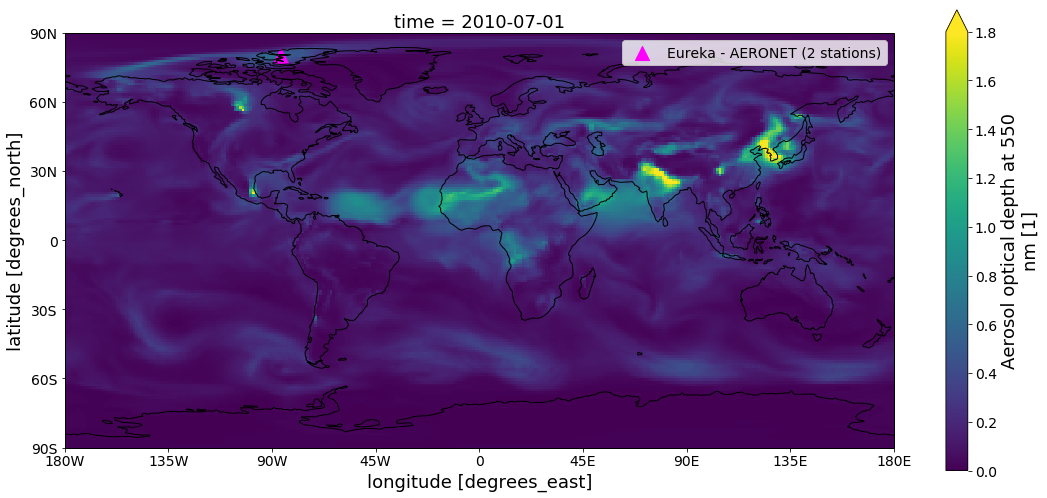

In [40]:
plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
#ax.set_ylim(90, 50)
#ax.set_xlim(-120, -70)

map_data = ecmwf_data['od550aer'].sel(time = '2010-07-01T01', method='nearest')
#map_data = map_data.sel(lat=slice(90,50), lon=slice(360-120, 360-70))
map_data.plot(zorder=0, vmin=0, vmax=1.8)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
#plt.savefig('results/map_ecmwf_01072010.png')

Same figure for SPRINTARS

<Figure size 1440x720 with 0 Axes>

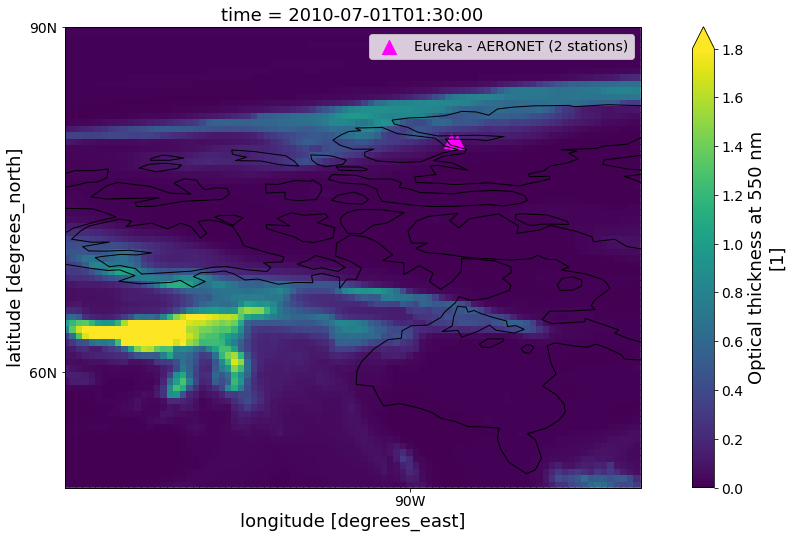

In [45]:
plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
ax.set_ylim(90, 50)
ax.set_xlim(-120, -70)

map_data = sprintars_data['od550aer'].sel(time = '2010-07-01T01', method='nearest')
#map_data = map_data.sel(lat=slice(90,50), lon=slice(-120, -70))
map_data.plot(zorder=0, vmin=0, vmax=1.8)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
#plt.savefig('results/map_ecmwf_01072010_sprintars_zoom.png')

Same figure for CAM5.3OSLO

<Figure size 1440x720 with 0 Axes>

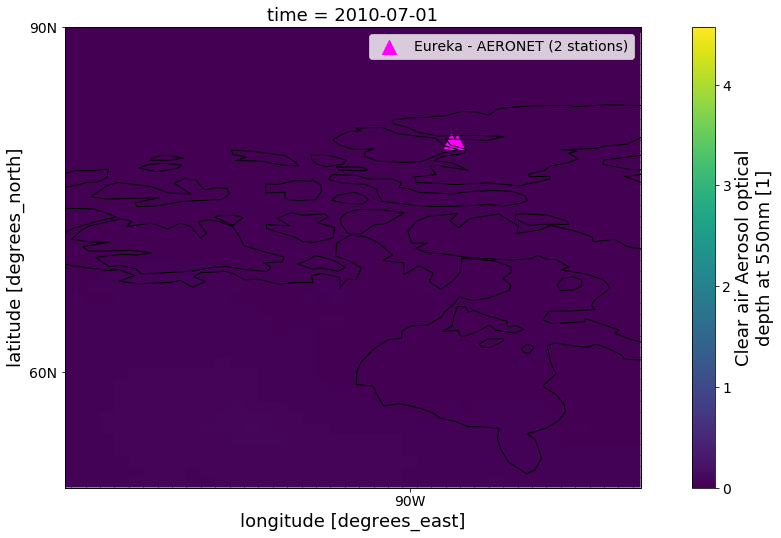

In [47]:
plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
ax.set_ylim(90, 50)
ax.set_xlim(-120, -70)

map_data = cam53_data['od550csaer'].sel(time = '2010-07-01T01', method='nearest')
#map_data = map_data.sel(lat=slice(90,50), lon=slice(-120, -70))
map_data.plot(zorder=0)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
#plt.savefig('results/map_ecmwf_01072010_cam53_zoom.png')

<Figure size 1440x720 with 0 Axes>

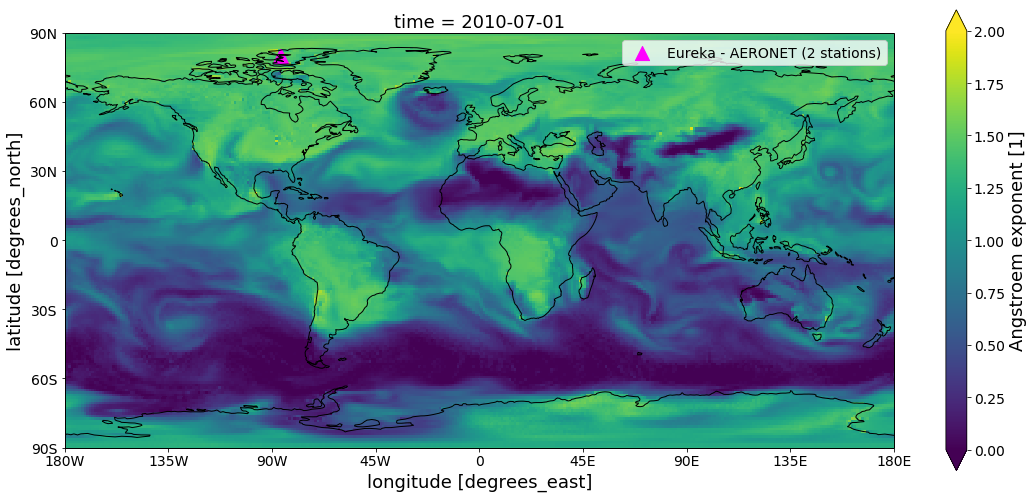

In [38]:
plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(marker='^', markersize=200, color='magenta',  label='Eureka - AERONET')
#ax.set_ylim(90, 50)
#ax.set_xlim(-120, -70)

map_data = ecmwf_data_ang['ang4487aer'].sel(time = '2010-07-01T01', method='nearest')
#map_data = map_data.sel(lat=slice(90,50), lon=slice(360-120, 360-70))
map_data.plot(zorder=0, vmin=0, vmax=2.0)

ax.set_xlabell = ('longitude')
ax.set_ylabel = ('latitude')
#plt.savefig('results/map_ecmwf_01072010_ang.png')

In [39]:
plt.figure(figsize=(20,10))


ax = eureka_data.plot_station_coordinates(marker='^', markersize=200, color='blue', ax=ax1, label='Eureka - AERONET')
ax.set_ylim(90, 55)
ax.set_xlim(-110, -60)

map_data = ecmwf_data['ang'].sel(time = '2010-06-29T01', method='nearest')
map_data = map_data.sel(lat=slice(90,55), lon=slice(360-110, 360-60))
map_data.plot(zorder=0)


NameError: name 'ax1' is not defined

<Figure size 1440x720 with 0 Axes>

# Results

# Discussion and outlook

# Conclusions

# References

https://github.com/takluyver/cite2c

Weigum, N., Schutgens, N., and Stier, P.: Effect of aerosol subgrid variability on aerosol optical depth and cloud condensation nuclei: implications for global aerosol modelling, Atmos. Chem. Phys., 16, 13619-13639, https://doi.org/10.5194/acp-16-13619-2016, 2016.


Wang, R., Andrews, E., Balkanski, Y., Boucher, O., Myhre, G., Samset, B. H., et al. (2018). Spatial representativeness error in the ground‐level observation networks for black carbon radiation absorption. Geophysical Research Letters, 45, 2106–2114. https://doi.org/10.1002/2017GL076817


# Supplementary material